# Aid effectiveness

## Loading Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../selected_data.csv')
df.head()

,Country Code,Category Name,Indicator Name,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Country Name
0,ALB,agriculture_rural_development,Rural population (% of total population),63.300,62.751,62.201,61.646,61.089,60.527,59.965,...,44.613,43.577,42.566,41.579,40.617,39.681,38.771,37.888,37.031,Albania
1,ARG,agriculture_rural_development,Rural population (% of total population),12.672,12.458,12.248,12.040,11.836,11.634,11.436,...,8.751,8.623,8.497,8.373,8.251,8.130,8.009,7.889,7.771,Argentina
2,ARM,agriculture_rural_development,Rural population (% of total population),32.850,33.122,33.394,33.668,33.943,34.219,34.496,...,36.836,36.888,36.915,36.918,36.897,36.851,36.781,36.687,36.569,Armenia
3,AUS,agriculture_rural_development,Rural population (% of total population),14.597,14.715,14.843,14.972,15.102,15.233,15.364,...,14.498,14.398,14.299,14.200,14.096,13.988,13.876,13.759,13.638,Australia
4,AUT,agriculture_rural_development,Rural population (% of total population),37.311,37.583,37.856,38.130,38.404,38.680,38.955,...,42.664,42.474,42.285,42.095,41.906,41.703,41.485,41.252,41.005,Austria


In [3]:
category_name = 'aid_effectiveness'

In [4]:
df = df[df['Category Name'] == category_name]
df.head()

,Country Code,Category Name,Indicator Name,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Country Name
194,ALB,aid_effectiveness,Net migration,-56599.0,-59634.0,-61925.0,-63700.0,-65106.0,-65800.0,-65975.0,...,-16845.0,-14265.0,-12240.0,-10887.0,-9768.0,-9106.0,-8889.0,-9117.0,-10612.0,Albania
195,ARG,aid_effectiveness,Net migration,-8569.0,-13201.0,-16383.0,-18725.0,-19736.0,-20396.0,-20588.0,...,5369.0,5801.0,5522.0,5215.0,4926.0,4690.0,4478.0,2344.0,2344.0,Argentina
196,ARM,aid_effectiveness,Net migration,5419.0,-196273.0,-126968.0,-112567.0,-50217.0,-51023.0,-51638.0,...,-28257.0,-27763.0,-27283.0,-26804.0,-26326.0,-25835.0,-25363.0,-12825.0,-12825.0,Armenia
197,AUS,aid_effectiveness,Net migration,68867.0,34149.0,23422.0,53636.0,79727.0,82770.0,67260.0,...,214564.0,198120.0,209466.0,242184.0,244875.0,220307.0,235860.0,117929.0,117929.0,Australia
198,AUT,aid_effectiveness,Net migration,77195.0,71035.0,33610.0,2844.0,1447.0,3969.0,1459.0,...,56494.0,74263.0,115125.0,66282.0,45573.0,35404.0,41105.0,20314.0,20314.0,Austria


In [5]:
df['Indicator Name'].unique()

array(['Net migration',
       'Vulnerable employment, total (% of total employment) (modeled ILO estimate)',
       'Mortality rate, under-5 (per 1,000 live births)'], dtype=object)

## Preprocess

In [6]:
import sys
sys.path.append('../')

In [7]:
from utlis.data_preprocess import fill_missing_with_mean, min_max_scaling_by_specific_category

df = fill_missing_with_mean(df)
df = min_max_scaling_by_specific_category(df)
df.head()

,Country Code,Category Name,Indicator Name,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Country Name
194,ALB,aid_effectiveness,Net migration,0.301234,0.401958,0.274981,0.196130,0.243267,0.209894,0.183773,...,0.585491,0.615310,0.636392,0.609534,0.530048,0.518045,0.500213,0.597451,0.446074,Albania
195,ARG,aid_effectiveness,Net migration,0.321877,0.416759,0.293182,0.215459,0.262954,0.229418,0.202940,...,0.592374,0.621411,0.641625,0.613840,0.535025,0.523541,0.505936,0.604190,0.458616,Argentina
196,ARM,aid_effectiveness,Net migration,0.327889,0.358403,0.248985,0.175127,0.249728,0.216248,0.189827,...,0.581955,0.611206,0.631960,0.605278,0.524439,0.511381,0.493160,0.595271,0.443931,Armenia
197,AUS,aid_effectiveness,Net migration,0.355158,0.431852,0.309091,0.246559,0.306114,0.273780,0.240038,...,0.657198,0.679887,0.701715,0.677204,0.616303,0.609430,0.605001,0.672147,0.570511,Australia
198,AUT,aid_effectiveness,Net migration,0.358738,0.443610,0.313162,0.224729,0.272146,0.239895,0.212250,...,0.608217,0.642228,0.673918,0.630169,0.548793,0.535775,0.521618,0.614755,0.476012,Austria


## Arithmetic mean

In [8]:
plot_mean_title = f'Mean of {category_name}'

In [9]:
df_mean = df[['Country Name','Indicator Name']].copy()
df_mean['Mean'] = df.loc[:,"1991":"2021"].mean(axis=1)
df_mean.head()

,Country Name,Indicator Name,Mean
194,Albania,Net migration,0.380121
195,Argentina,Net migration,0.394245
196,Armenia,Net migration,0.380395
197,Australia,Net migration,0.467731
198,Austria,Net migration,0.415101


### Dendogram

2024-05-26 17:09:16.603758: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


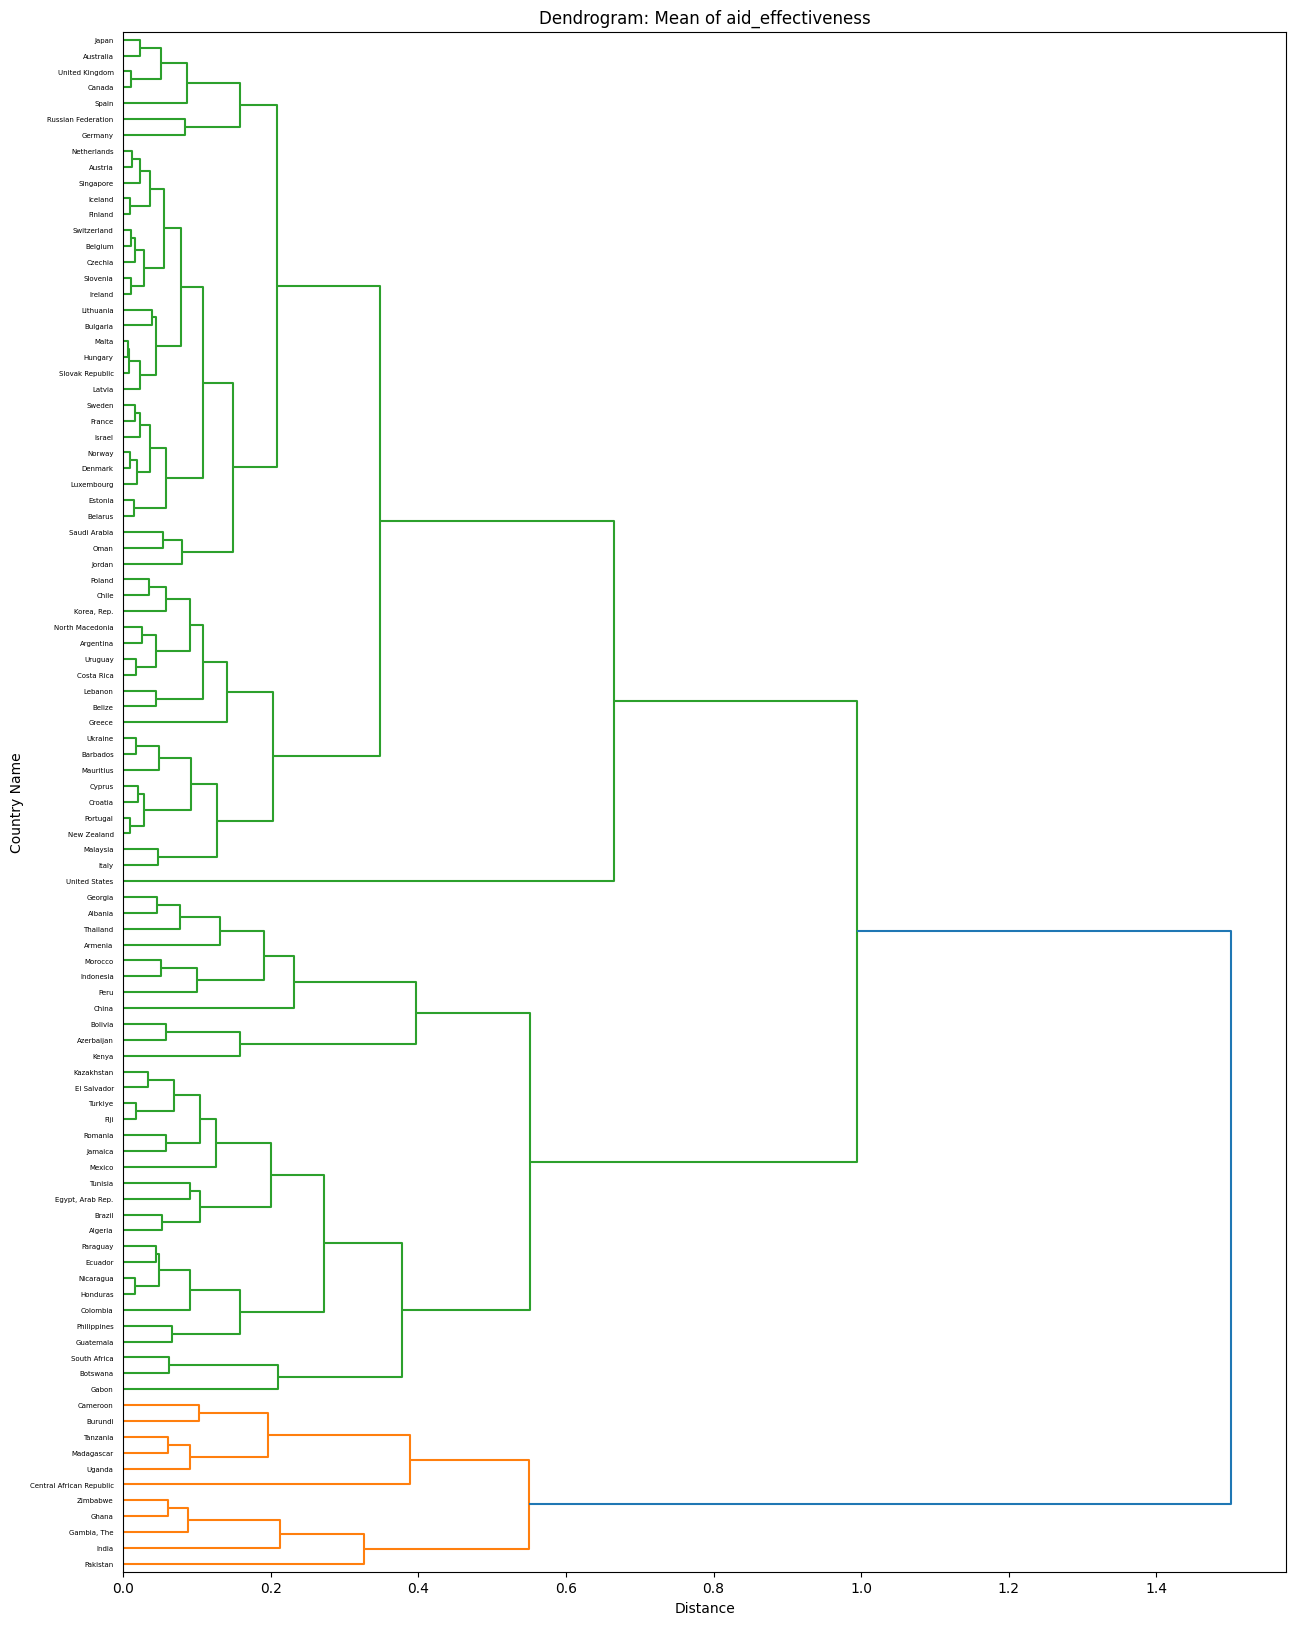

In [10]:
from utlis.visualisation import plot_dendogram

plot_dendogram(df_mean, plot_mean_title, 'Mean')

### KMeans

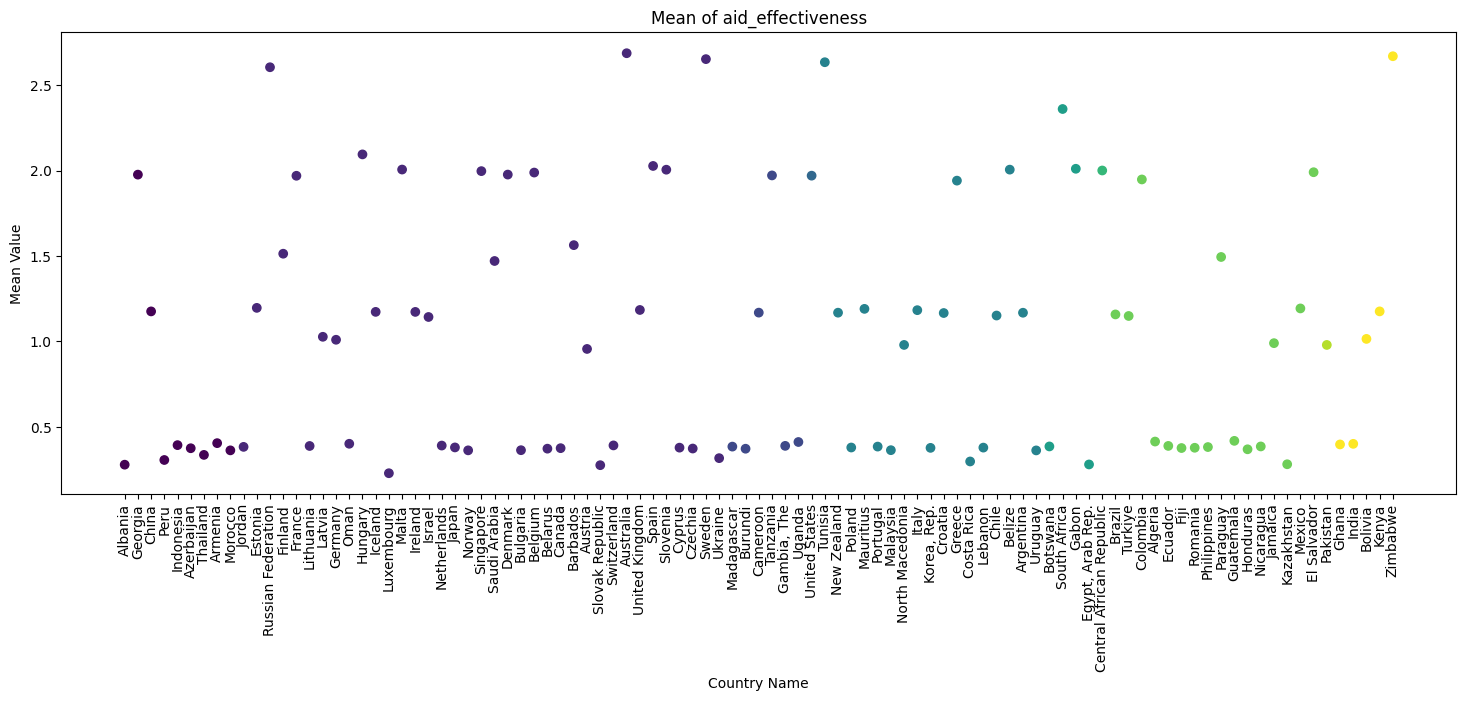

In [11]:
from utlis.kmeans import calculate_kmeans

k_means_outcome, cluster_centers = calculate_kmeans(df_mean, plot_mean_title, 'Mean')

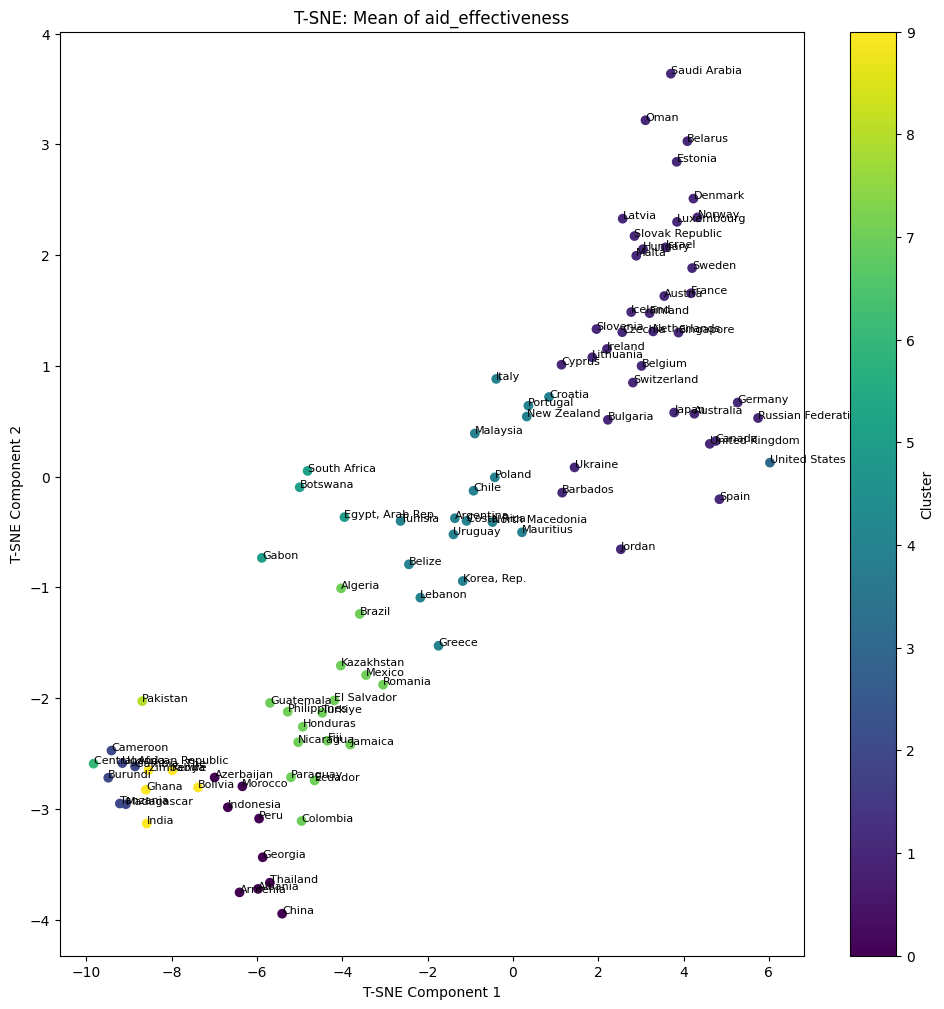

In [12]:
from utlis.visualisation import plot_tsne

plot_tsne(k_means_outcome.iloc[:, :-1], k_means_outcome.iloc[:, -1], plot_mean_title)

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


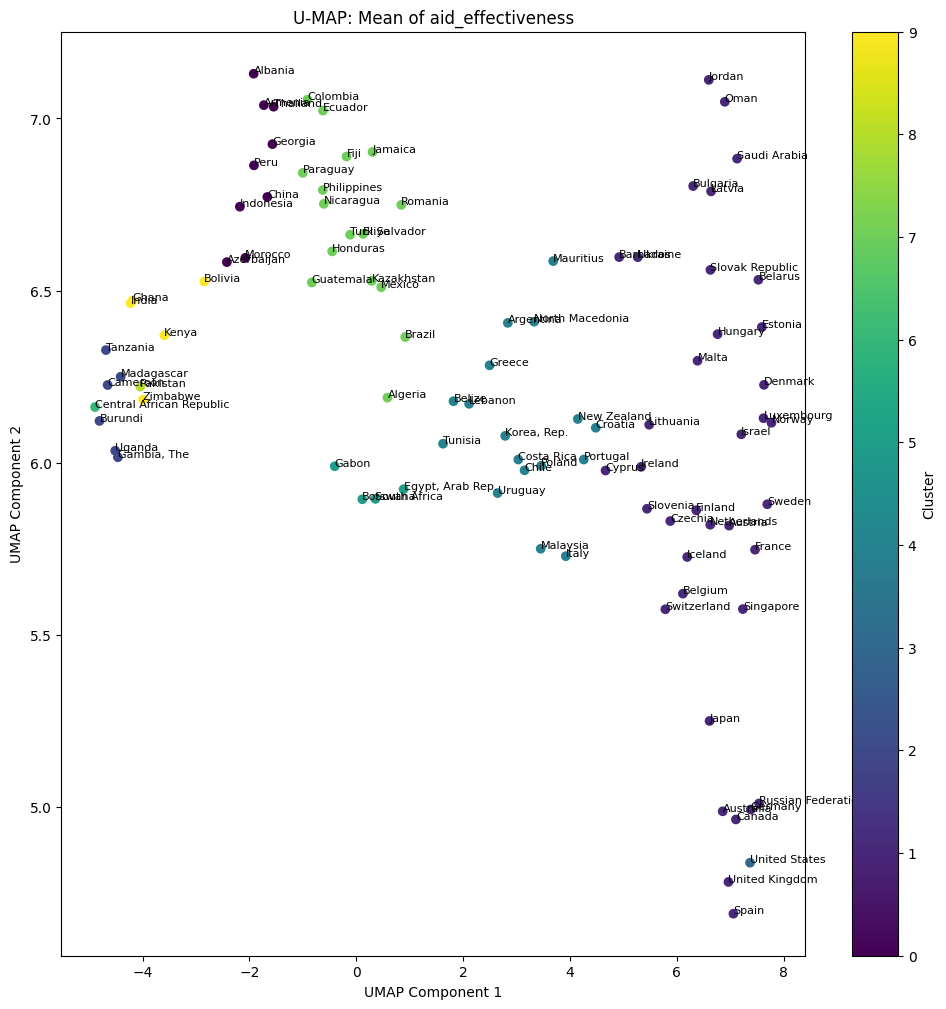

In [13]:
from utlis.visualisation import plot_umap

plot_umap(k_means_outcome.iloc[:, :-1], k_means_outcome.iloc[:, -1], plot_mean_title)

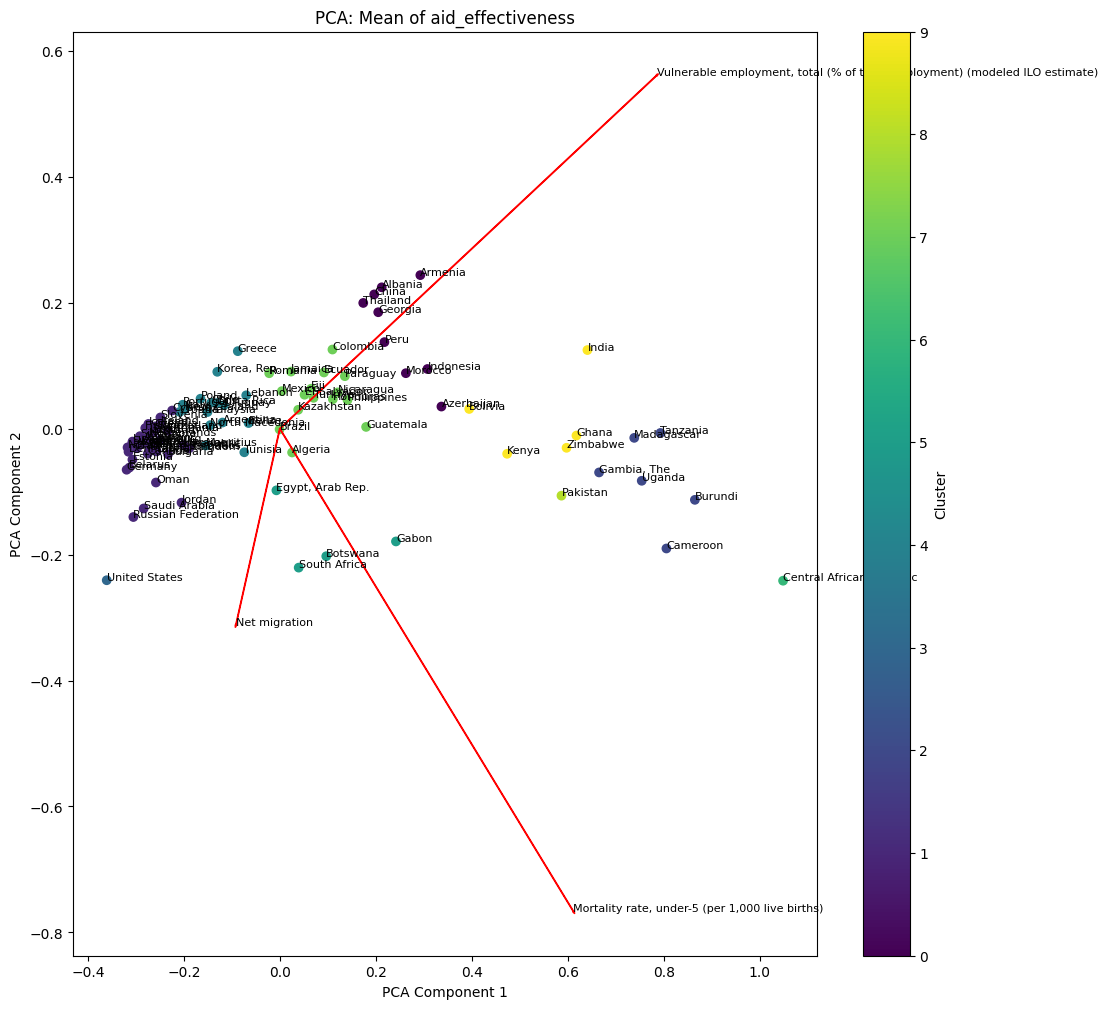

In [14]:
from utlis.visualisation import plot_pca

plot_pca(k_means_outcome.iloc[:, :-1], k_means_outcome.iloc[:, -1], k_means_outcome.columns.values[:-1], plot_mean_title)

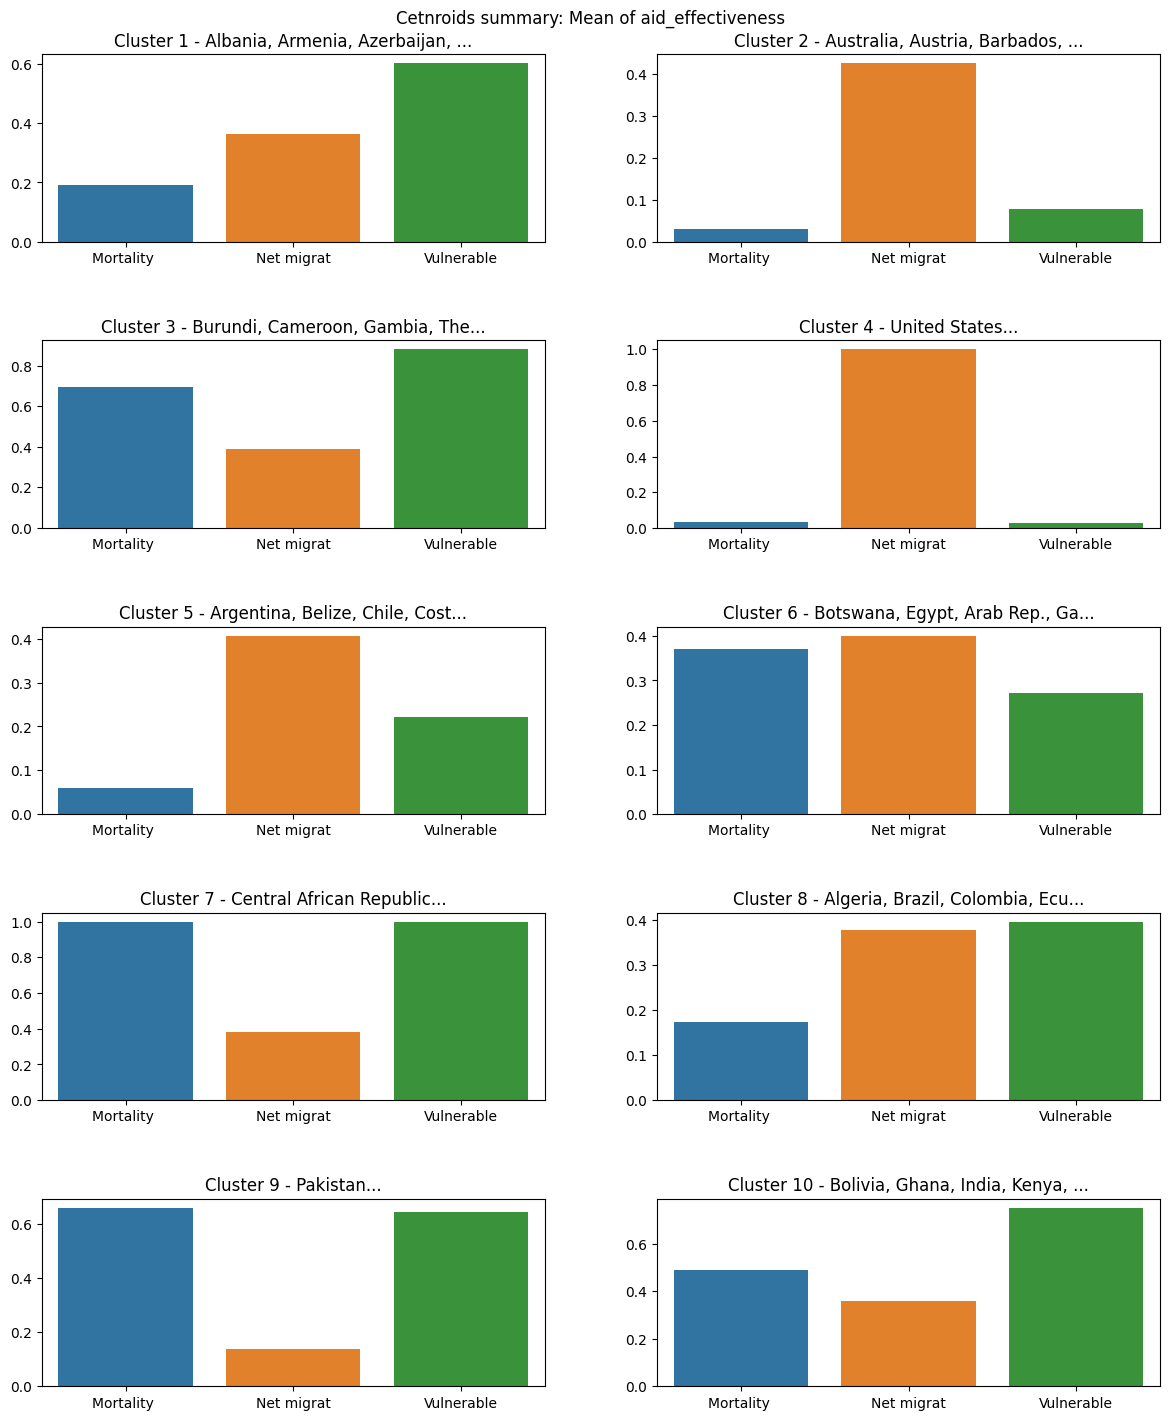

In [15]:
from utlis.visualisation import plot_centroid

plot_centroid(cluster_centers, k_means_outcome, plot_mean_title)

/tf/World_Bank_Data_Analysis/reports/../utlis/map_handler.py:34: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


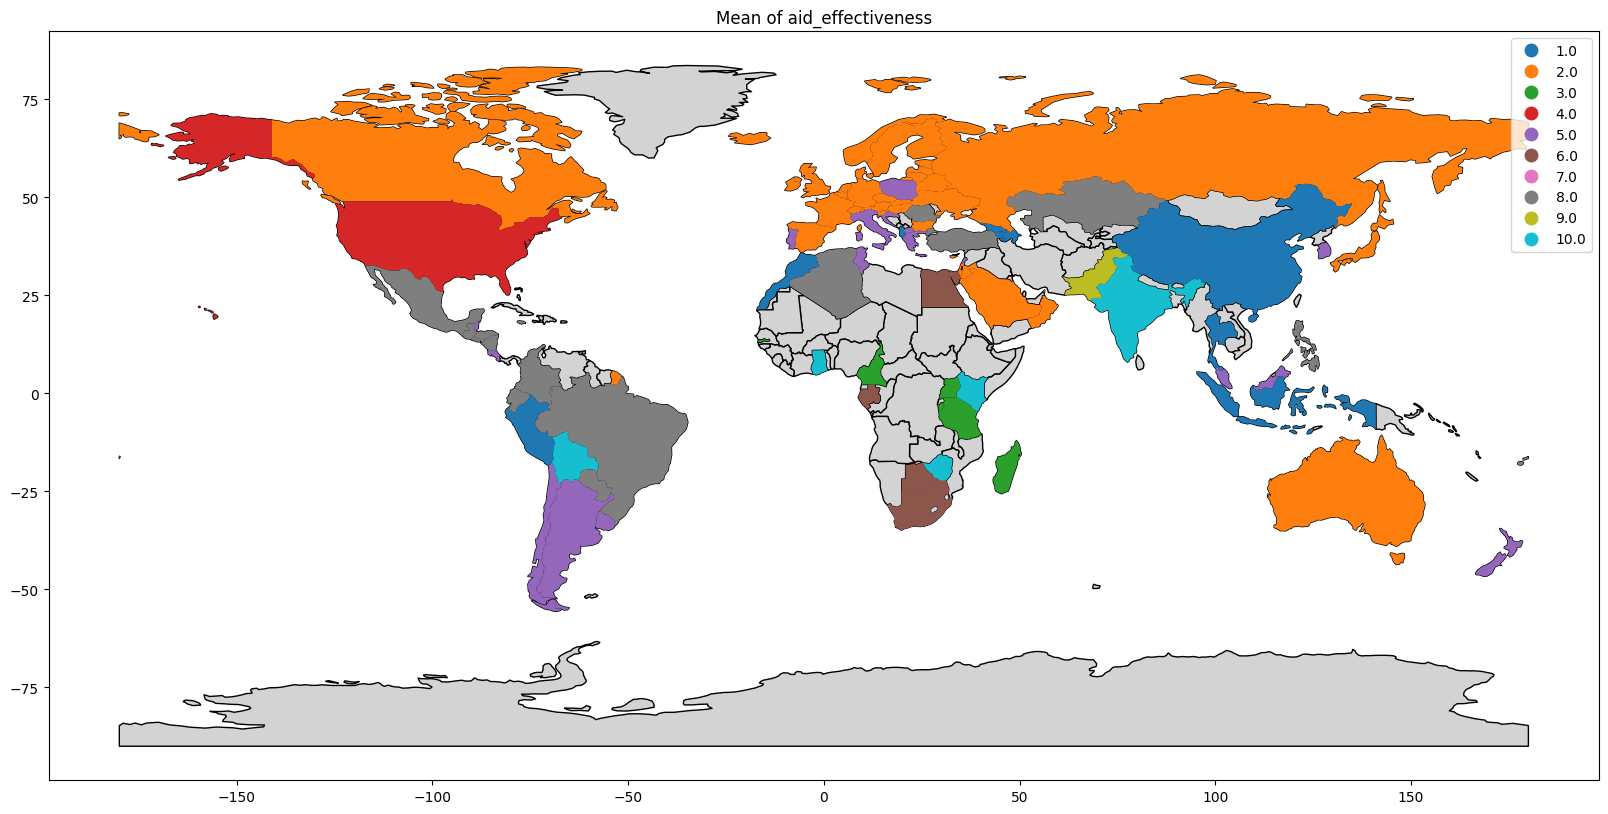

In [16]:
from utlis.map_handler import plot_map

plot_map(k_means_outcome['Cluster'], plot_mean_title)

## Last available year - 2021

In [17]:
plot_last_year_title = f'{category_name} for 2021'

In [18]:
df_2021 = df[['Country Name','Indicator Name', '2021']].copy()
df_2021.head()

,Country Name,Indicator Name,2021
194,Albania,Net migration,0.446074
195,Argentina,Net migration,0.458616
196,Armenia,Net migration,0.443931
197,Australia,Net migration,0.570511
198,Austria,Net migration,0.476012


### Dendogram

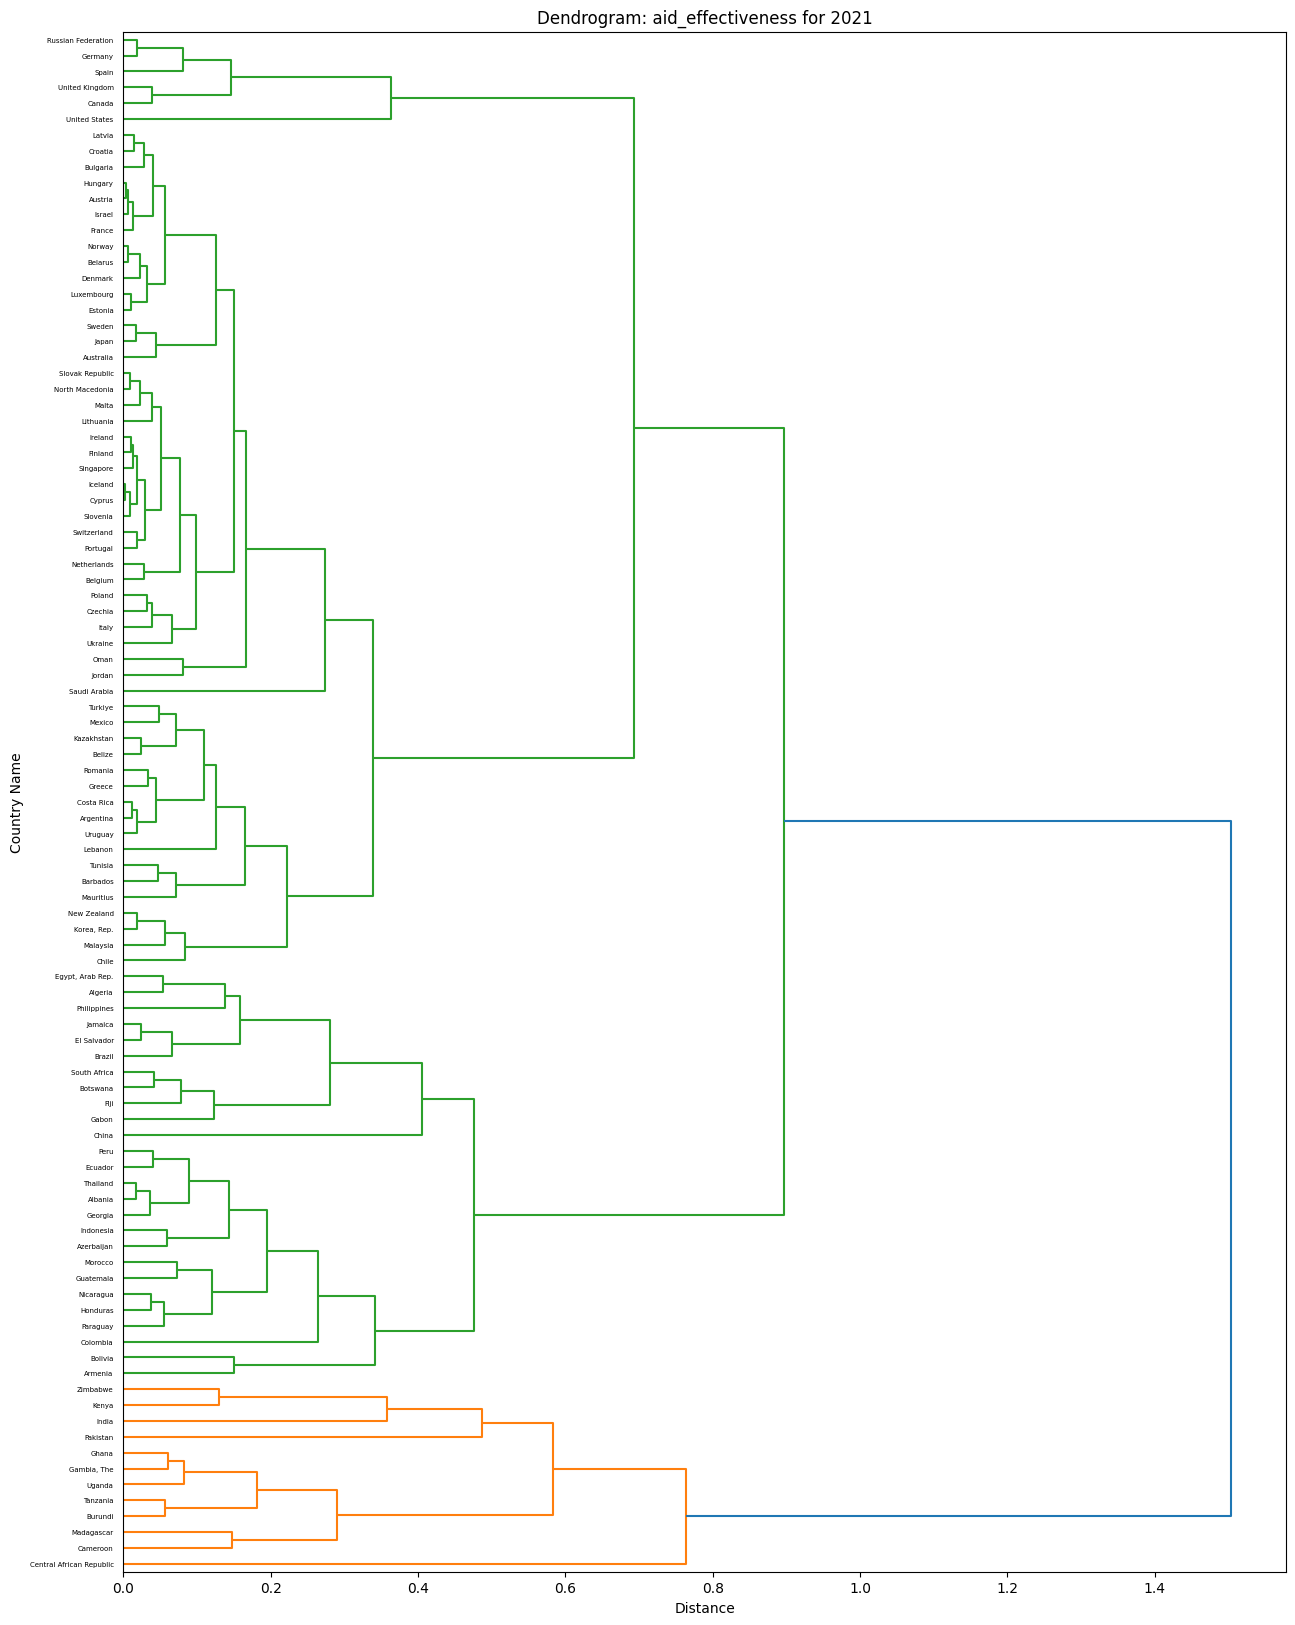

In [19]:
from utlis.visualisation import plot_dendogram

plot_dendogram(df_2021, plot_last_year_title, '2021')

### KMeans

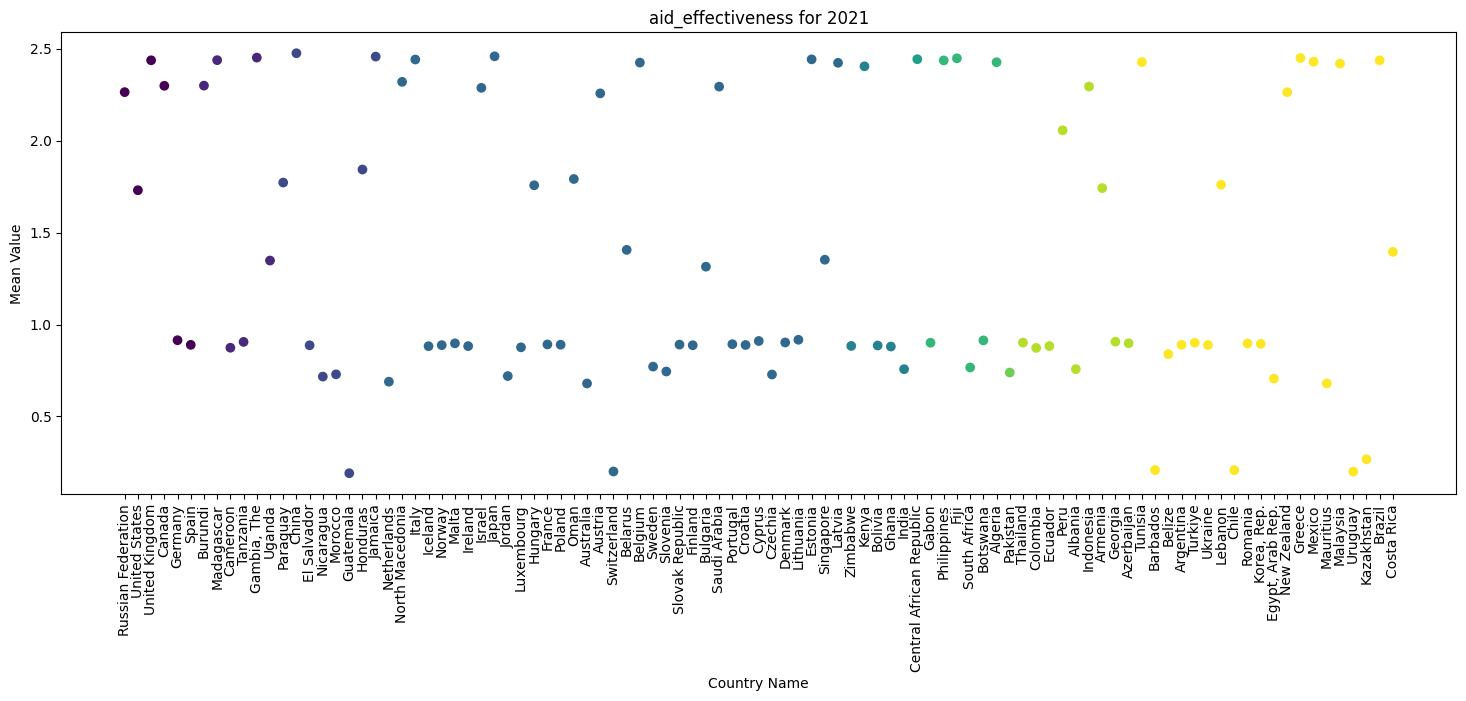

In [20]:
from utlis.kmeans import calculate_kmeans

k_means_outcome, cluster_centers = calculate_kmeans(df_2021, plot_last_year_title, '2021')

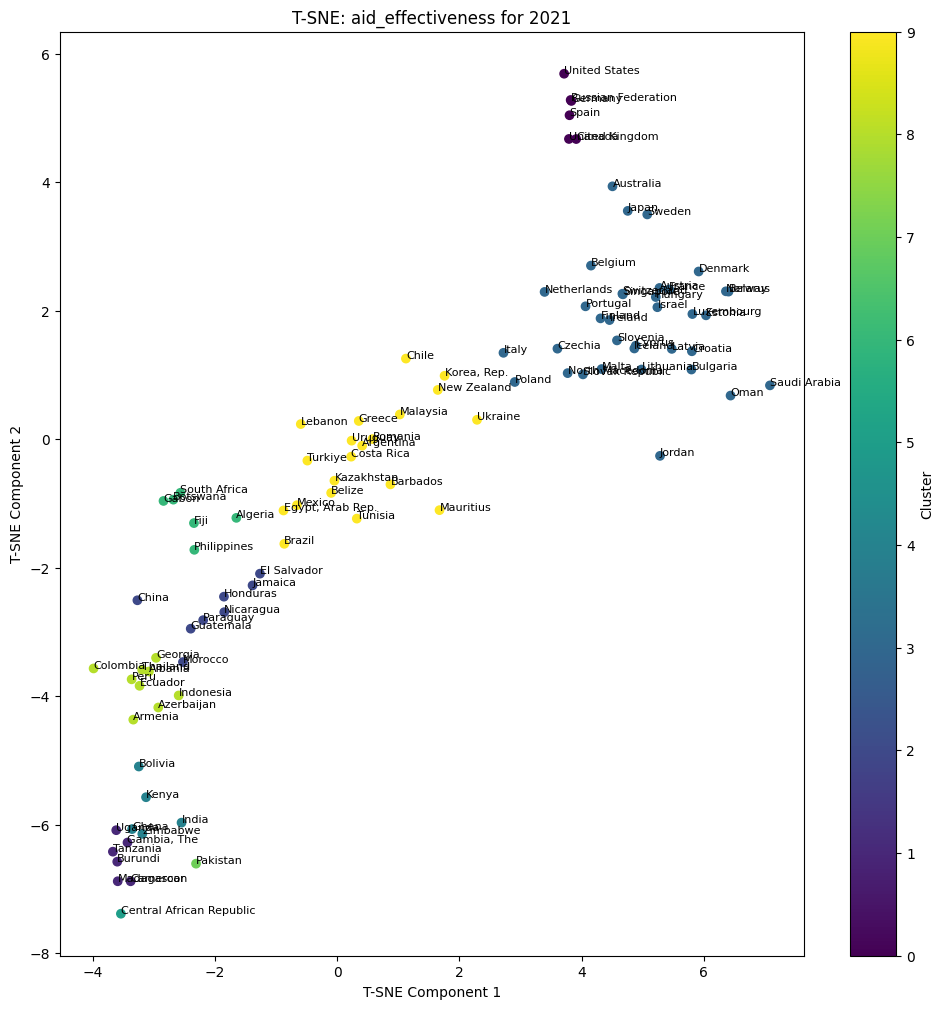

In [21]:
from utlis.visualisation import plot_tsne

plot_tsne(k_means_outcome.iloc[:, :-1], k_means_outcome.iloc[:, -1], plot_last_year_title)

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


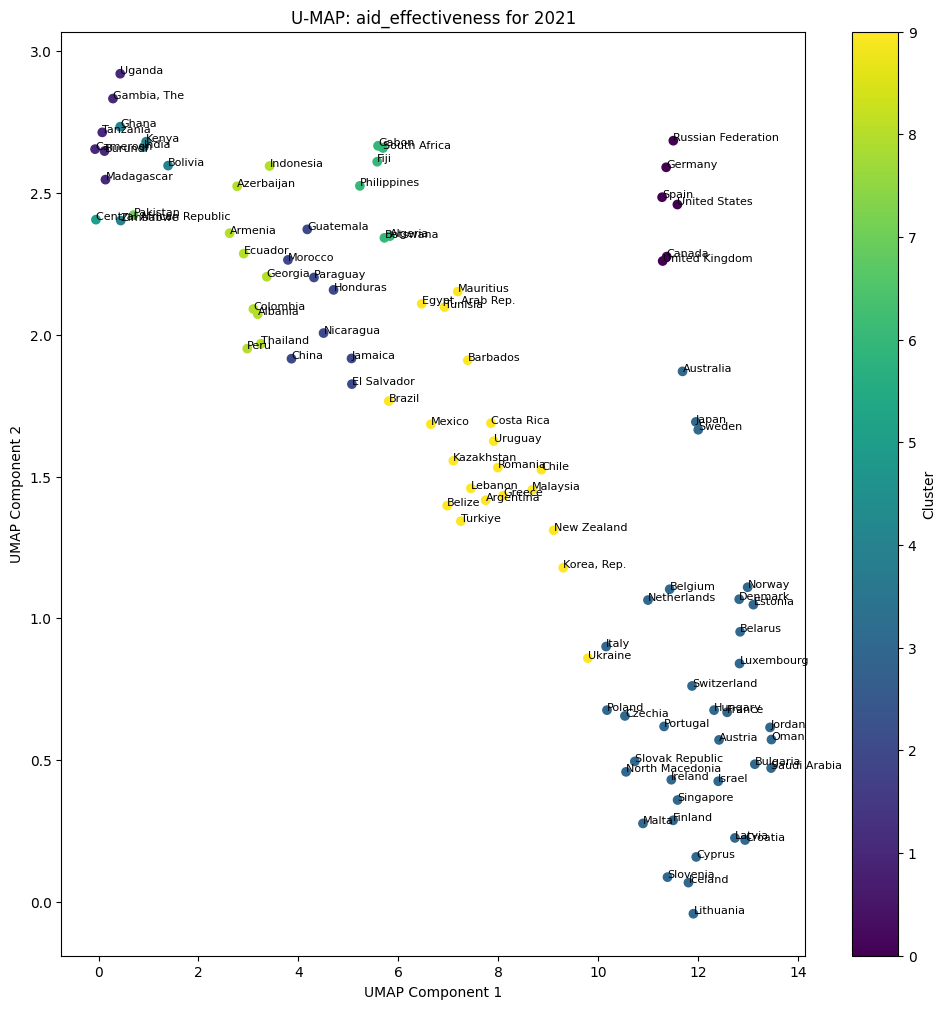

In [22]:
from utlis.visualisation import plot_umap

plot_umap(k_means_outcome.iloc[:, :-1], k_means_outcome.iloc[:, -1], plot_last_year_title)

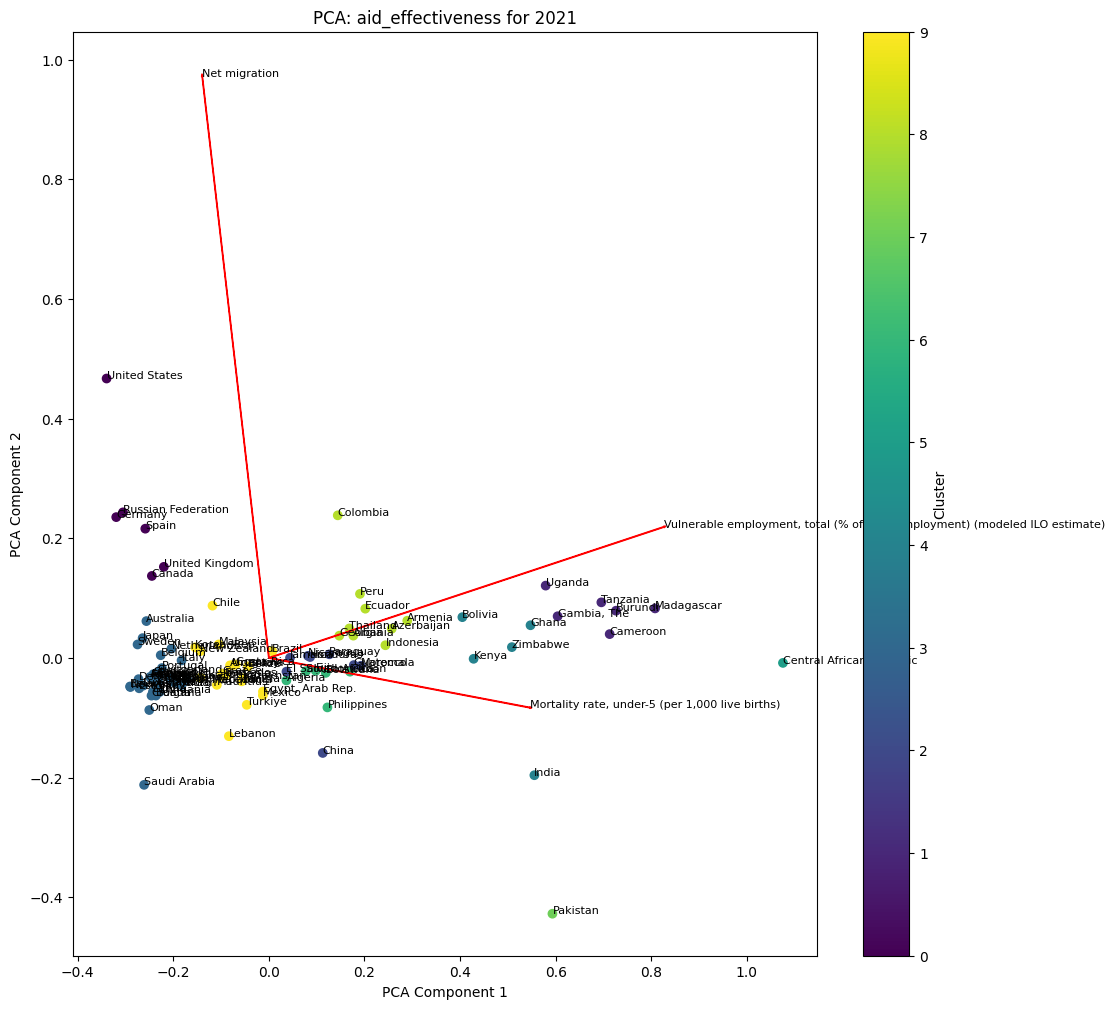

In [23]:
from utlis.visualisation import plot_pca

plot_pca(k_means_outcome.iloc[:, :-1], k_means_outcome.iloc[:, -1], k_means_outcome.columns.values[:-1], plot_last_year_title)

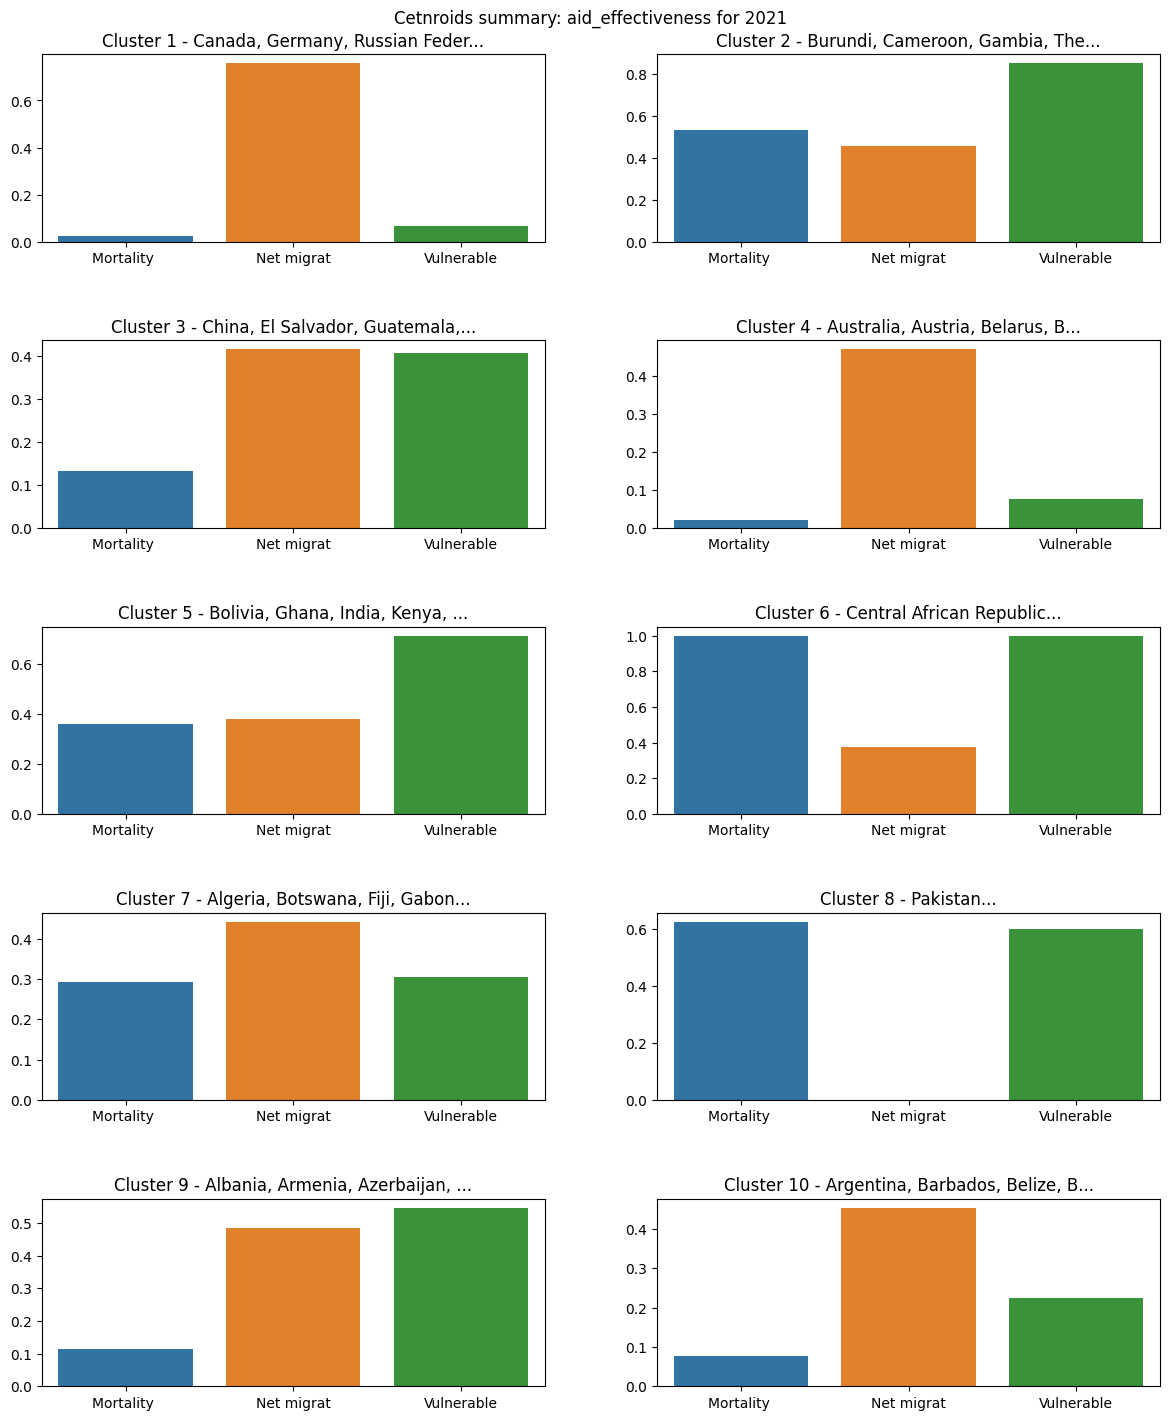

In [24]:
from utlis.visualisation import plot_centroid

plot_centroid(cluster_centers, k_means_outcome, plot_last_year_title)

/tf/World_Bank_Data_Analysis/reports/../utlis/map_handler.py:34: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


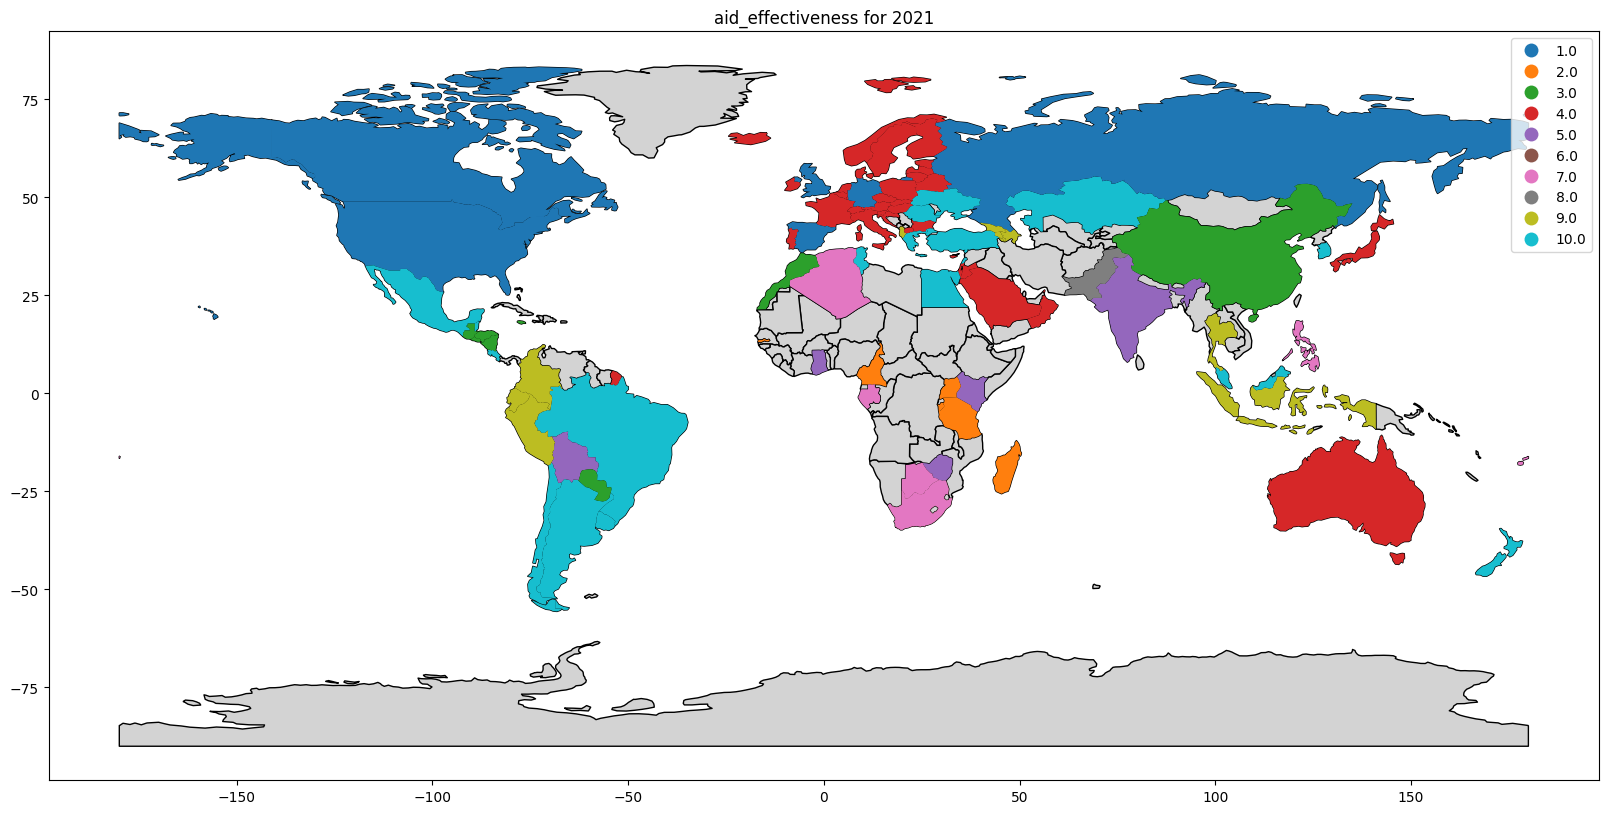

In [25]:
from utlis.map_handler import plot_map

plot_map(k_means_outcome['Cluster'], plot_last_year_title)

## Dynamic Time Warping

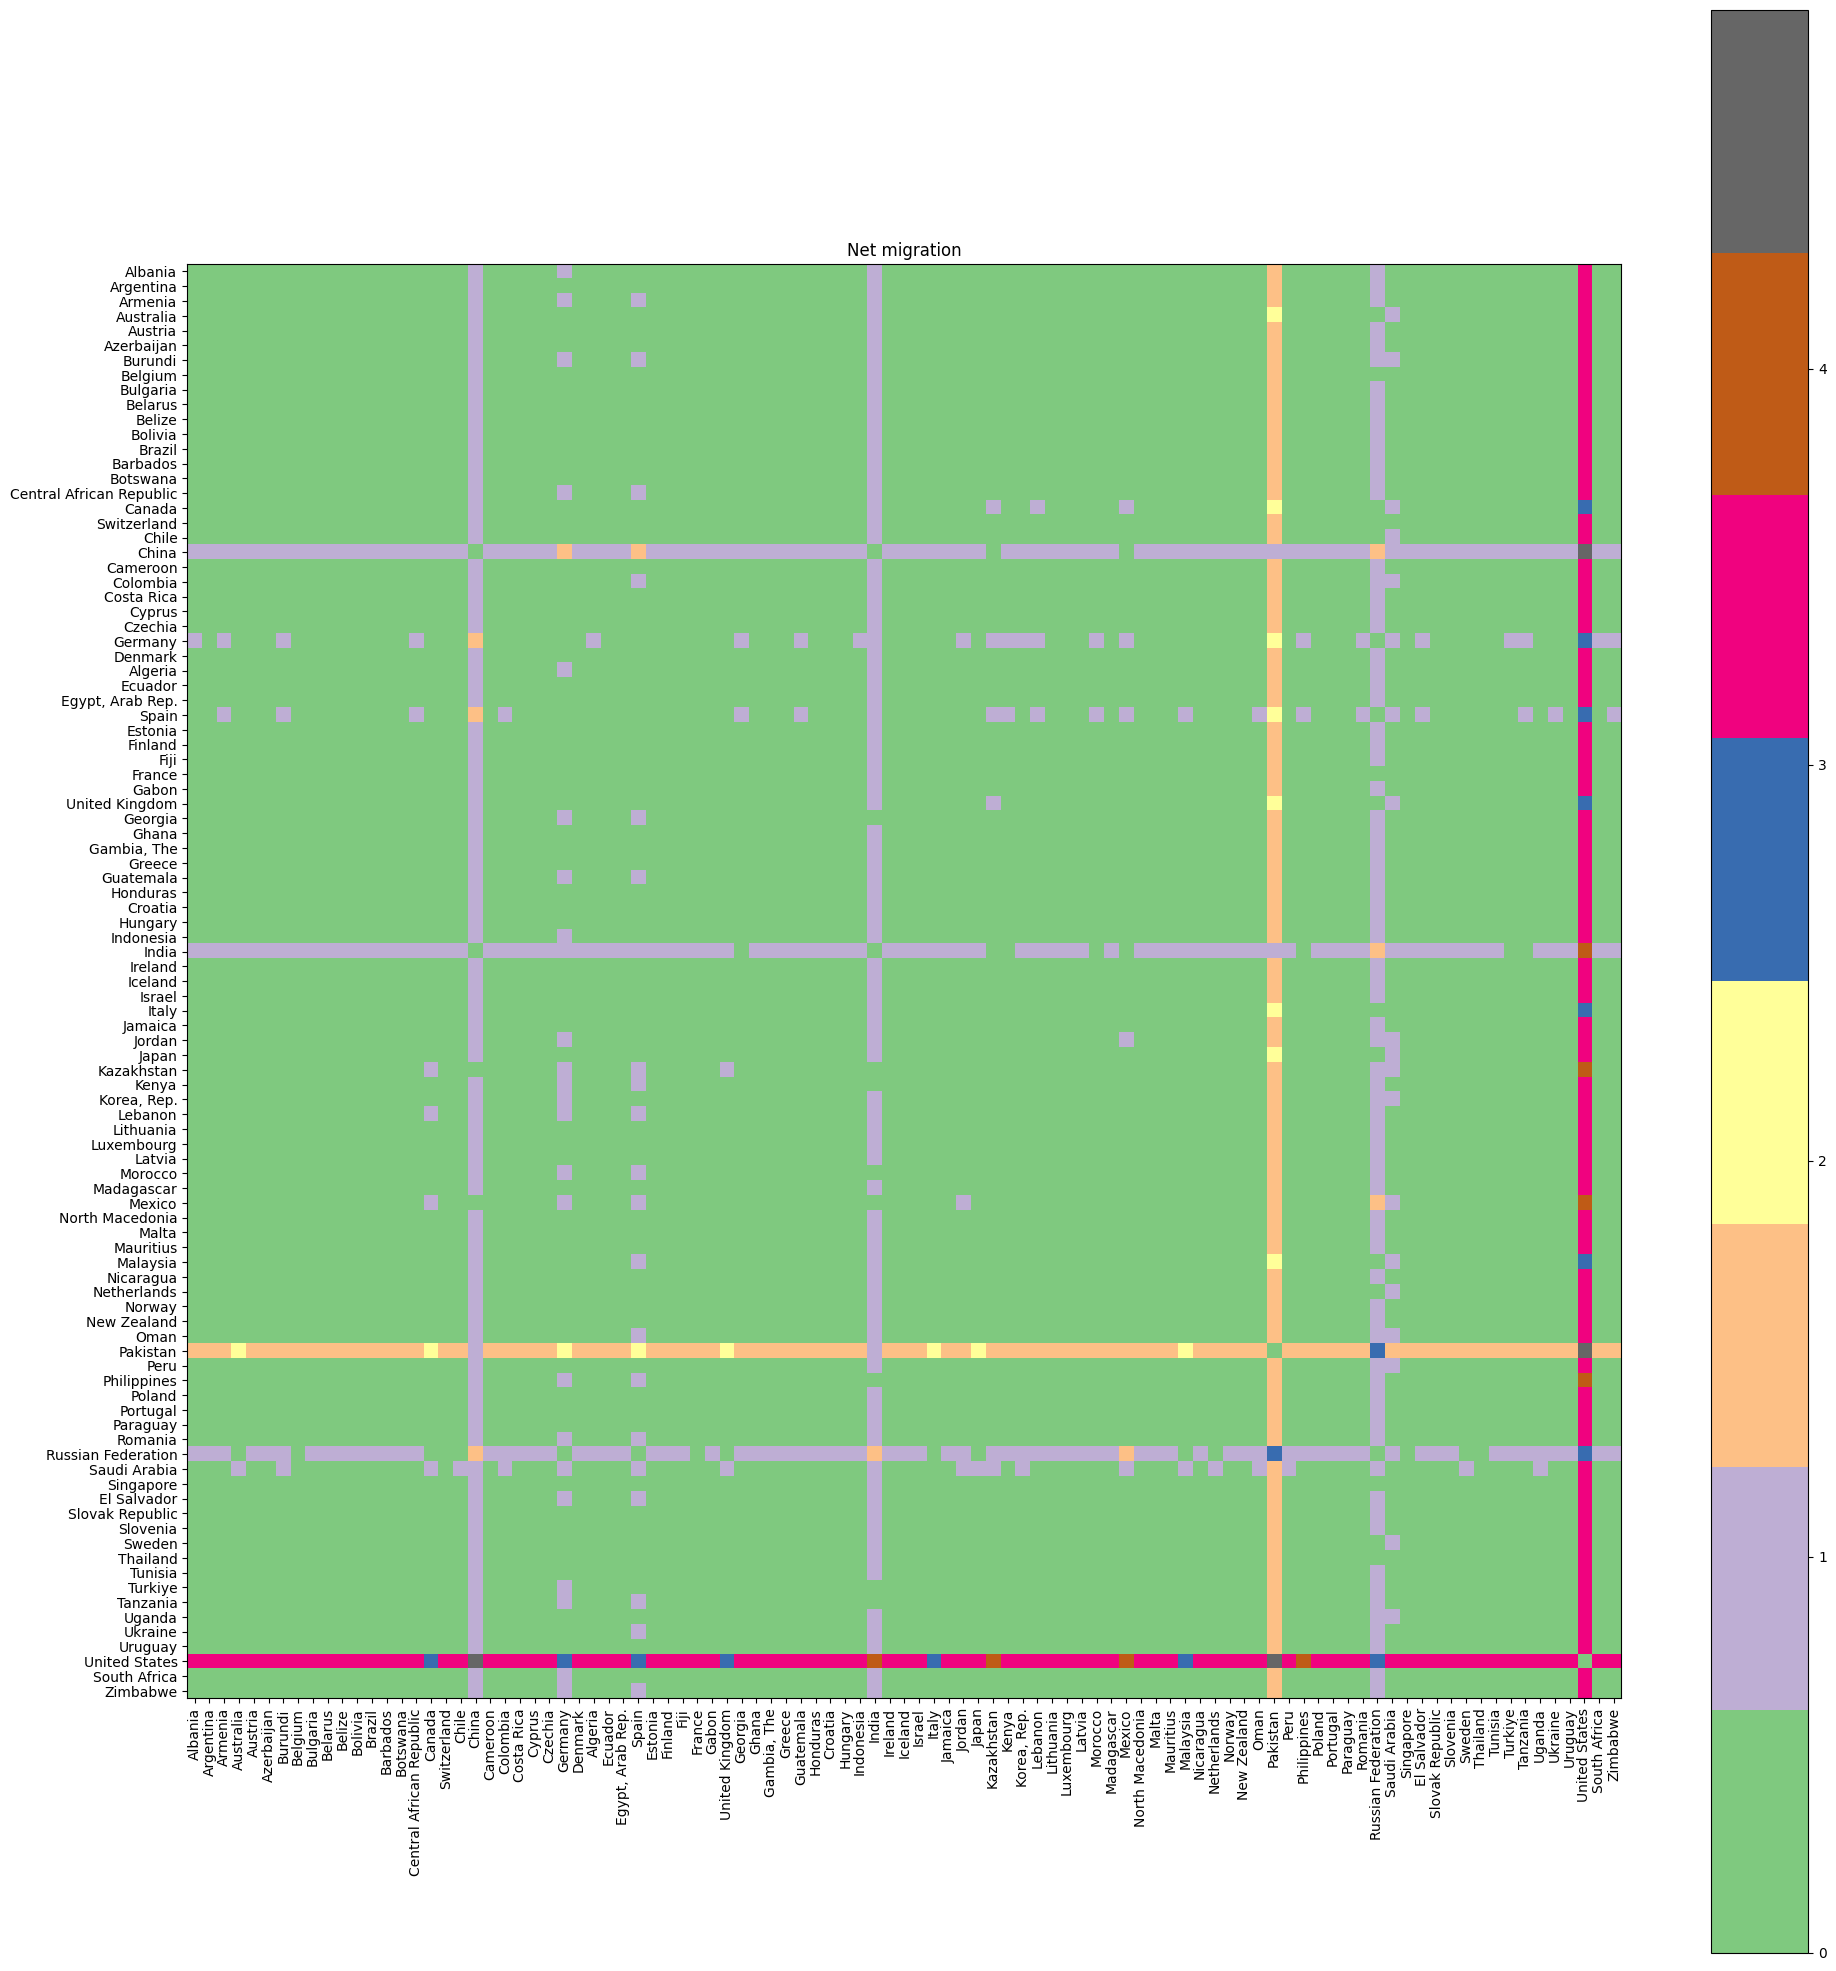

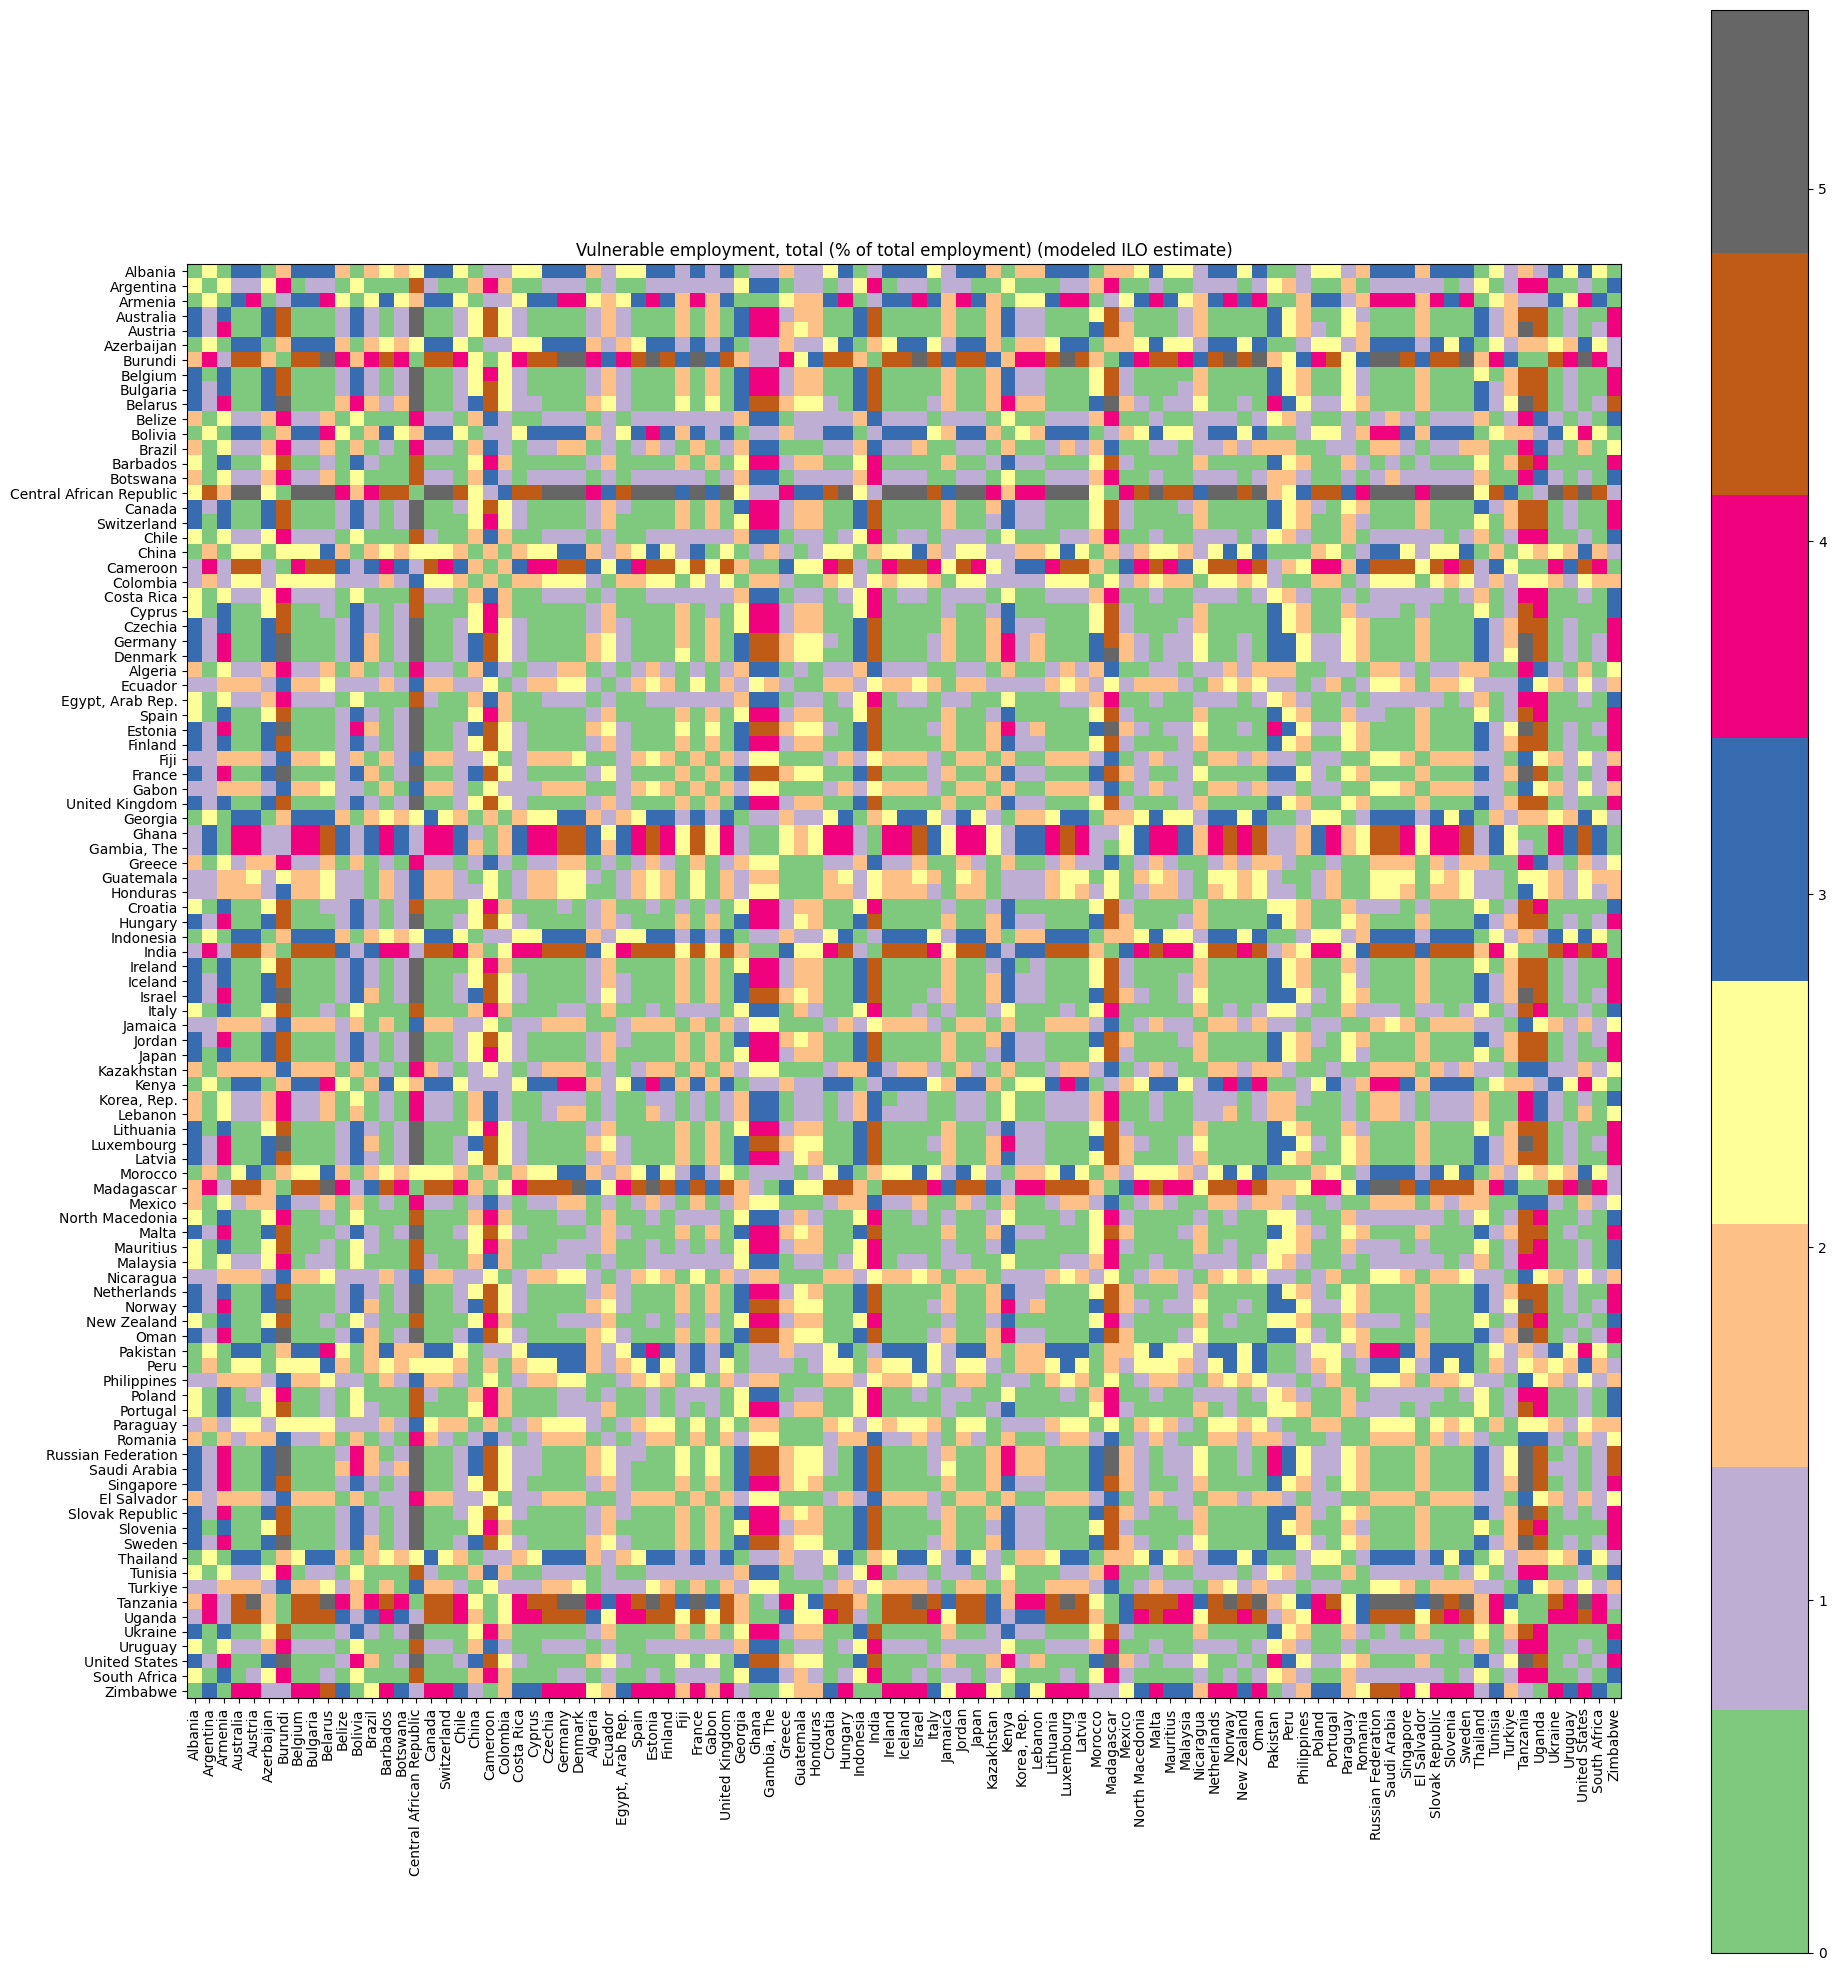

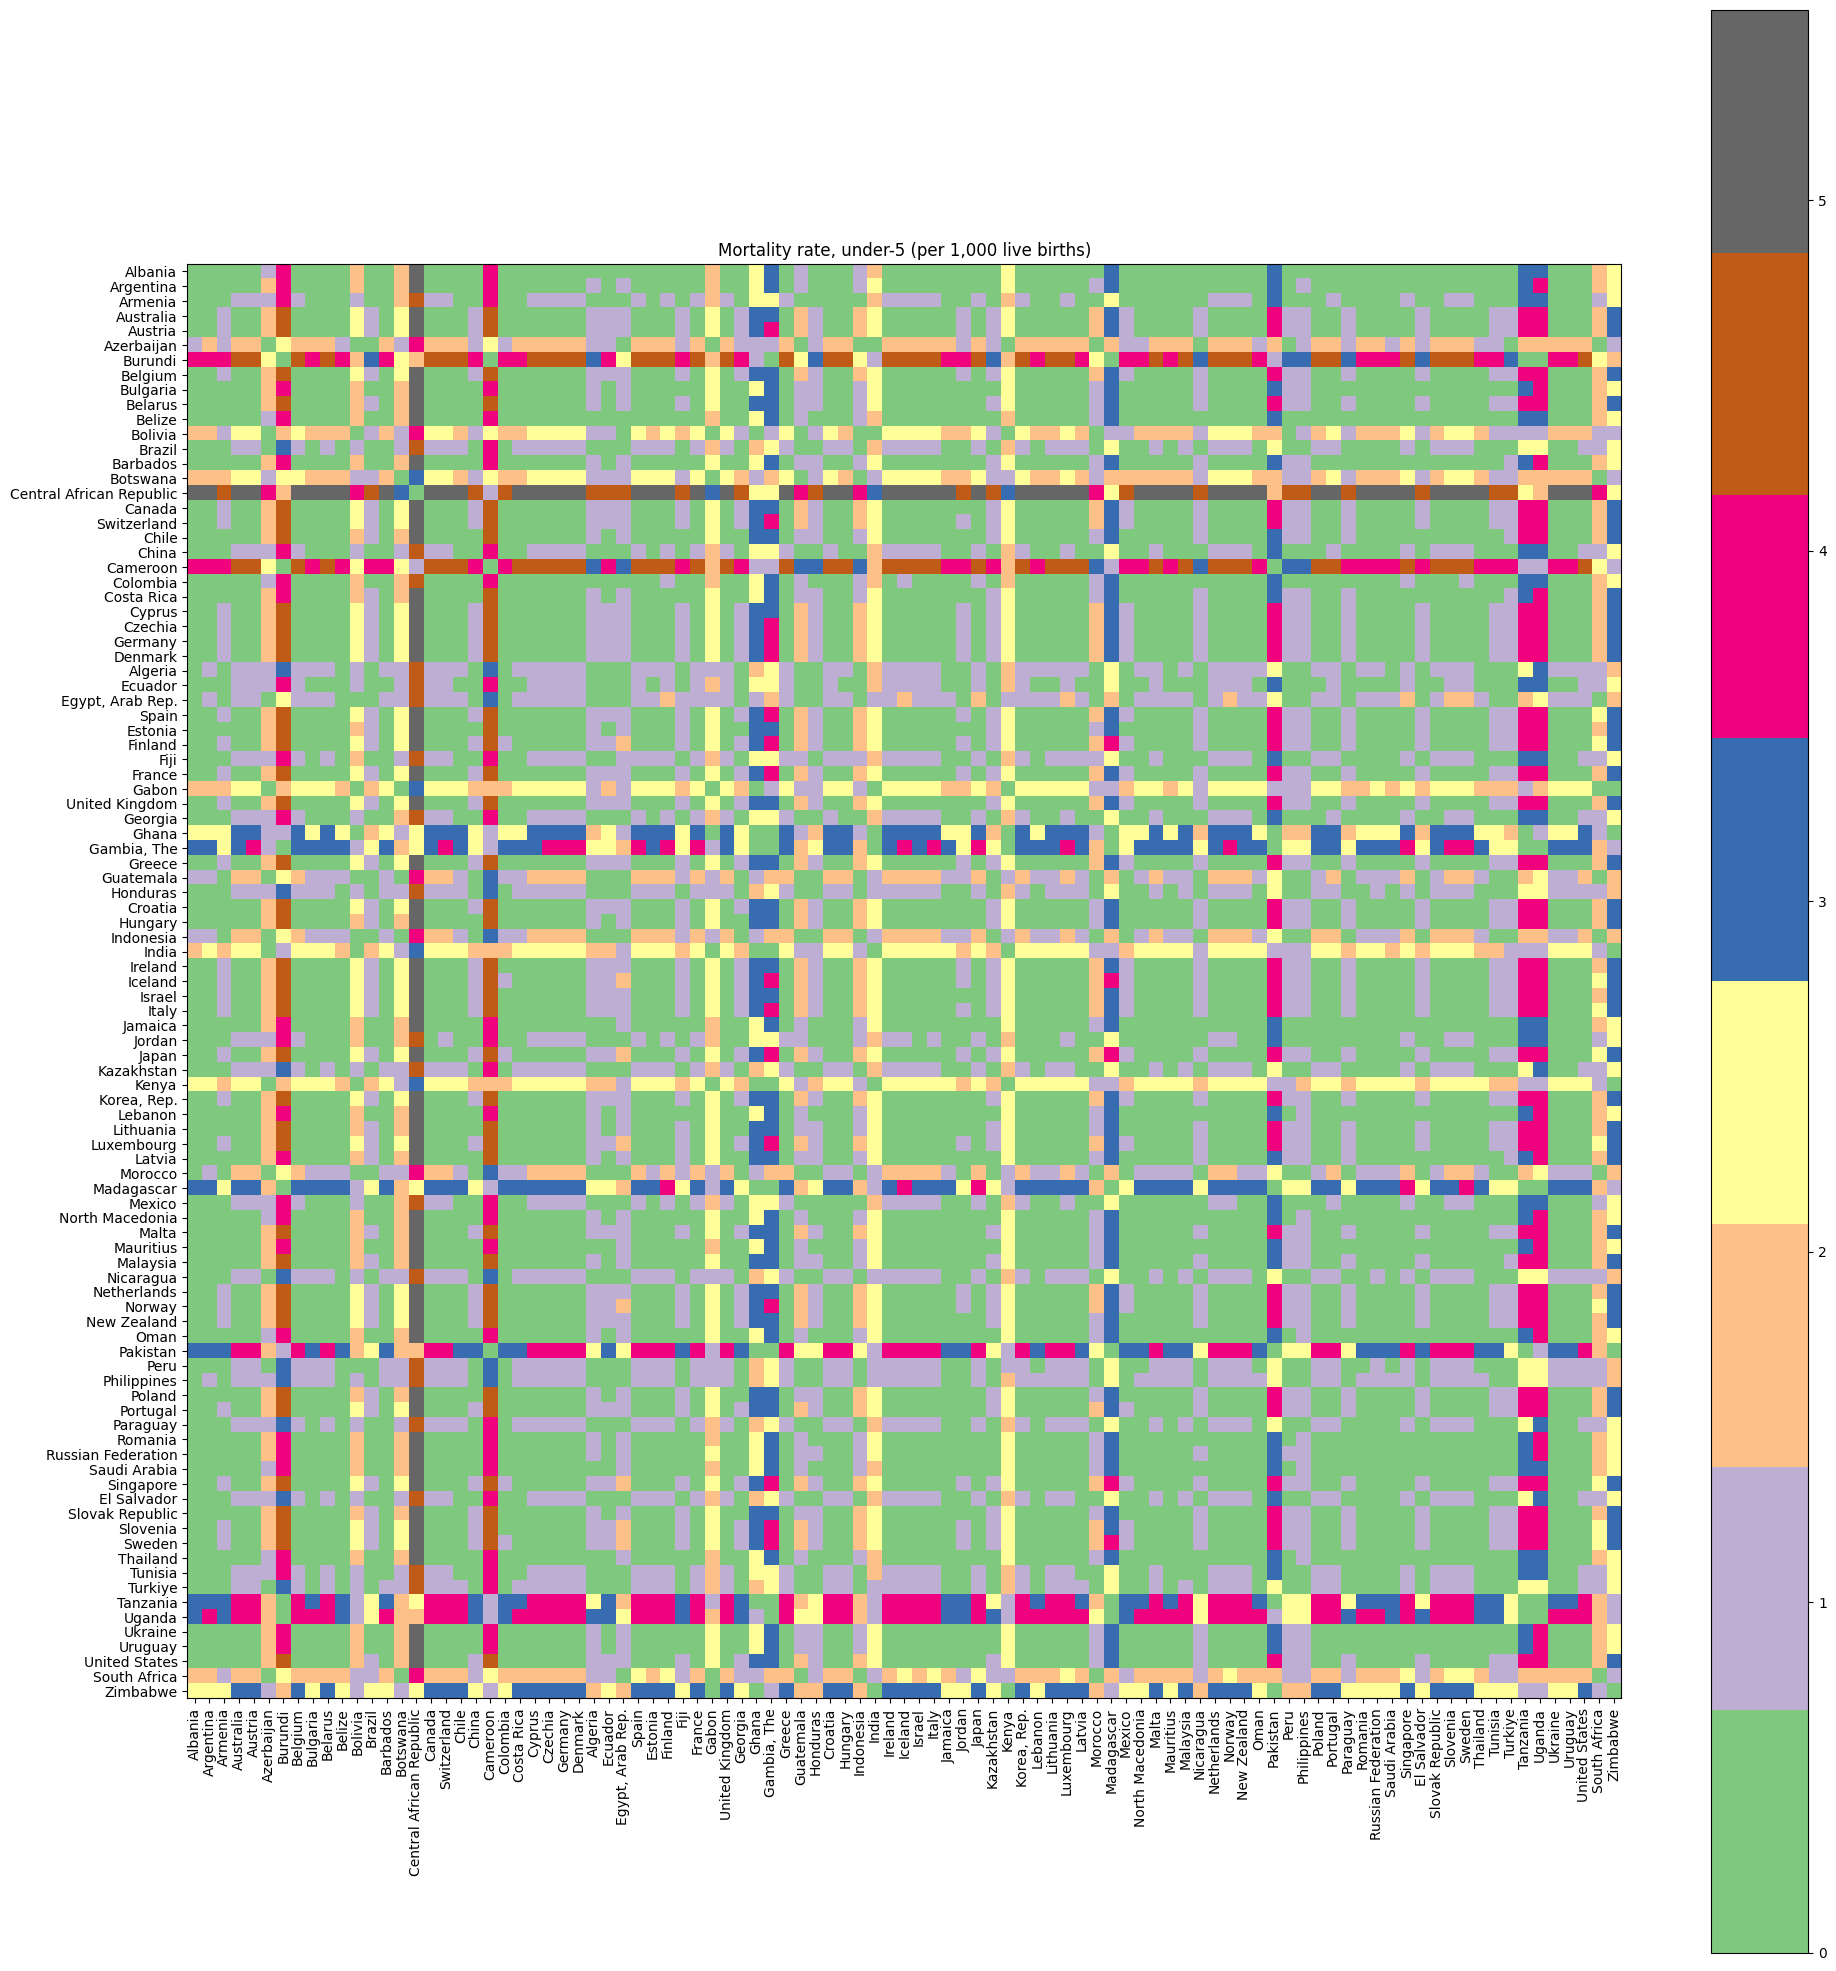

In [26]:
from utlis.dtw import get_indicator_dtw_matrix, plot_time_series_compare_matrix

for indicator in df['Indicator Name'].unique():
    indicator_compare_dataframe = get_indicator_dtw_matrix(df[df['Indicator Name'] == indicator])
    plot_time_series_compare_matrix(indicator_compare_dataframe, indicator_compare_dataframe.columns, indicator, 20)